In [1]:
import numpy as np
import ot
import pandas as pd
from collections import defaultdict
import seaborn as sns
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True, connected=True)
%matplotlib widget
import matplotlib.pyplot as plt
import TiOT_lib


In [2]:
file_path = 'DailyDelhiClimateTrain.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
# Ensure 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the date as the index if needed (optional)
df.set_index('date', inplace=True)

In [ ]:
lags = range(-365, 365, 2)
length = 365
start = 365
w_list = [0.2, 0.5, 0.8]
metric_names = ['TiOT'] + [f"TAOT(w = {w})" for w in w_list]
results = {**{'lag' : lags}, **{name: [] for name in metric_names}}
for lag in lags:
    results['TiOT'].append(np.sum(np.tril(TiOT_lib.TiOT(df['meantemp'].iloc[start:start + length].to_list(), df['meantemp'].iloc[start + lag:start + lag+length].to_list(), detail_mode = True)[1])))
    for w in w_list:
        results[f'TAOT(w = {w})'].append(np.sum(np.tril(TiOT_lib.TAOT(df['meantemp'].iloc[start:start + length].to_list(), df['meantemp'].iloc[start + lag:start + lag+length].to_list(), w=w)[1])))
    print(f'---> Done lag = {lag}')

---> Done lag = -365
---> Done lag = -363
---> Done lag = -361
---> Done lag = -359
---> Done lag = -357
---> Done lag = -355
---> Done lag = -353
---> Done lag = -351
---> Done lag = -349
---> Done lag = -347
---> Done lag = -345
---> Done lag = -343
---> Done lag = -341
---> Done lag = -339
---> Done lag = -337
---> Done lag = -335
---> Done lag = -333
---> Done lag = -331
---> Done lag = -329
---> Done lag = -327
---> Done lag = -325
---> Done lag = -323
---> Done lag = -321
---> Done lag = -319
---> Done lag = -317
---> Done lag = -315
---> Done lag = -313
---> Done lag = -311
---> Done lag = -309
---> Done lag = -307
---> Done lag = -305
---> Done lag = -303
---> Done lag = -301
---> Done lag = -299
---> Done lag = -297
---> Done lag = -295
---> Done lag = -293
---> Done lag = -291
---> Done lag = -289
---> Done lag = -287
---> Done lag = -285
---> Done lag = -283
---> Done lag = -281
---> Done lag = -279
---> Done lag = -277
---> Done lag = -275
---> Done lag = -273
---> Done lag

In [41]:
for name in metric_names:
    for i in range(len(results[name])):
        results[name][i] = np.sum(results[name][i])

In [42]:
results['TiOT'][0]

np.float64(0.25205479452054796)

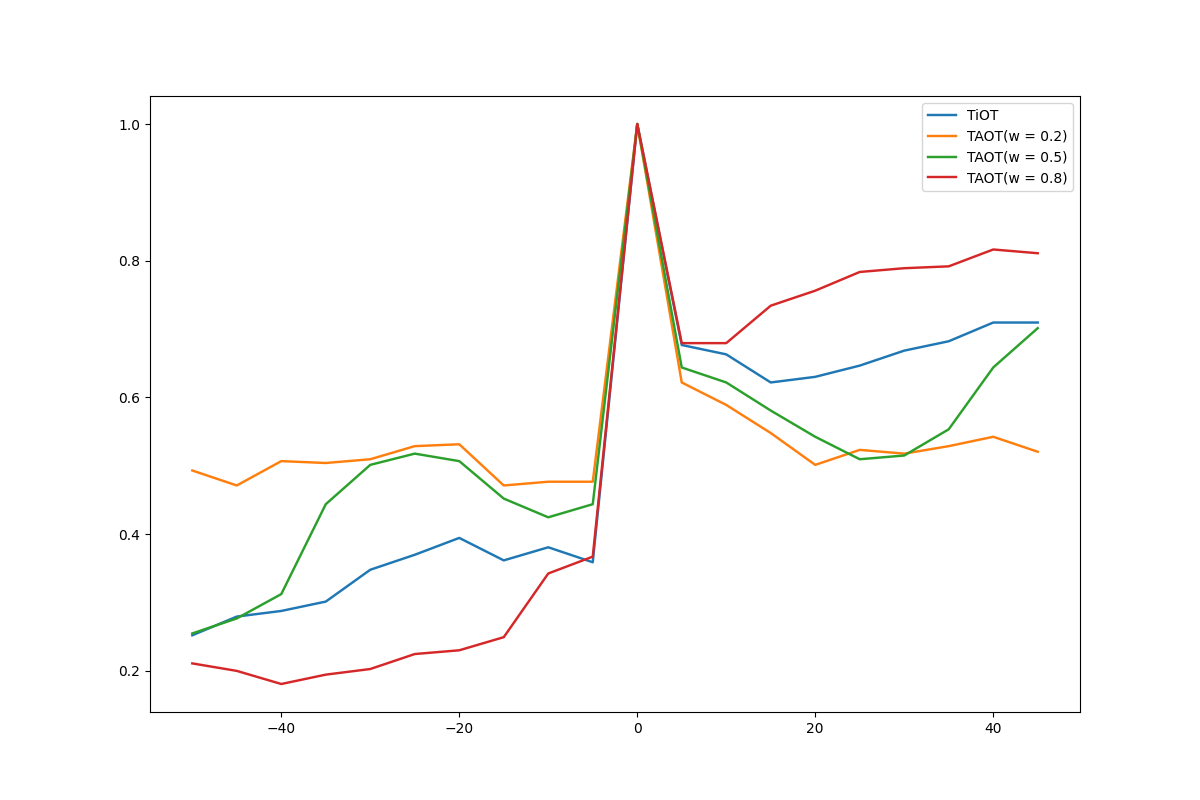

In [43]:
plt.figure(figsize=(12,8))
for name in metric_names:
    plt.plot(lags, results[name], label = name, linewidth=1.75)
plt.legend()
plt.show()

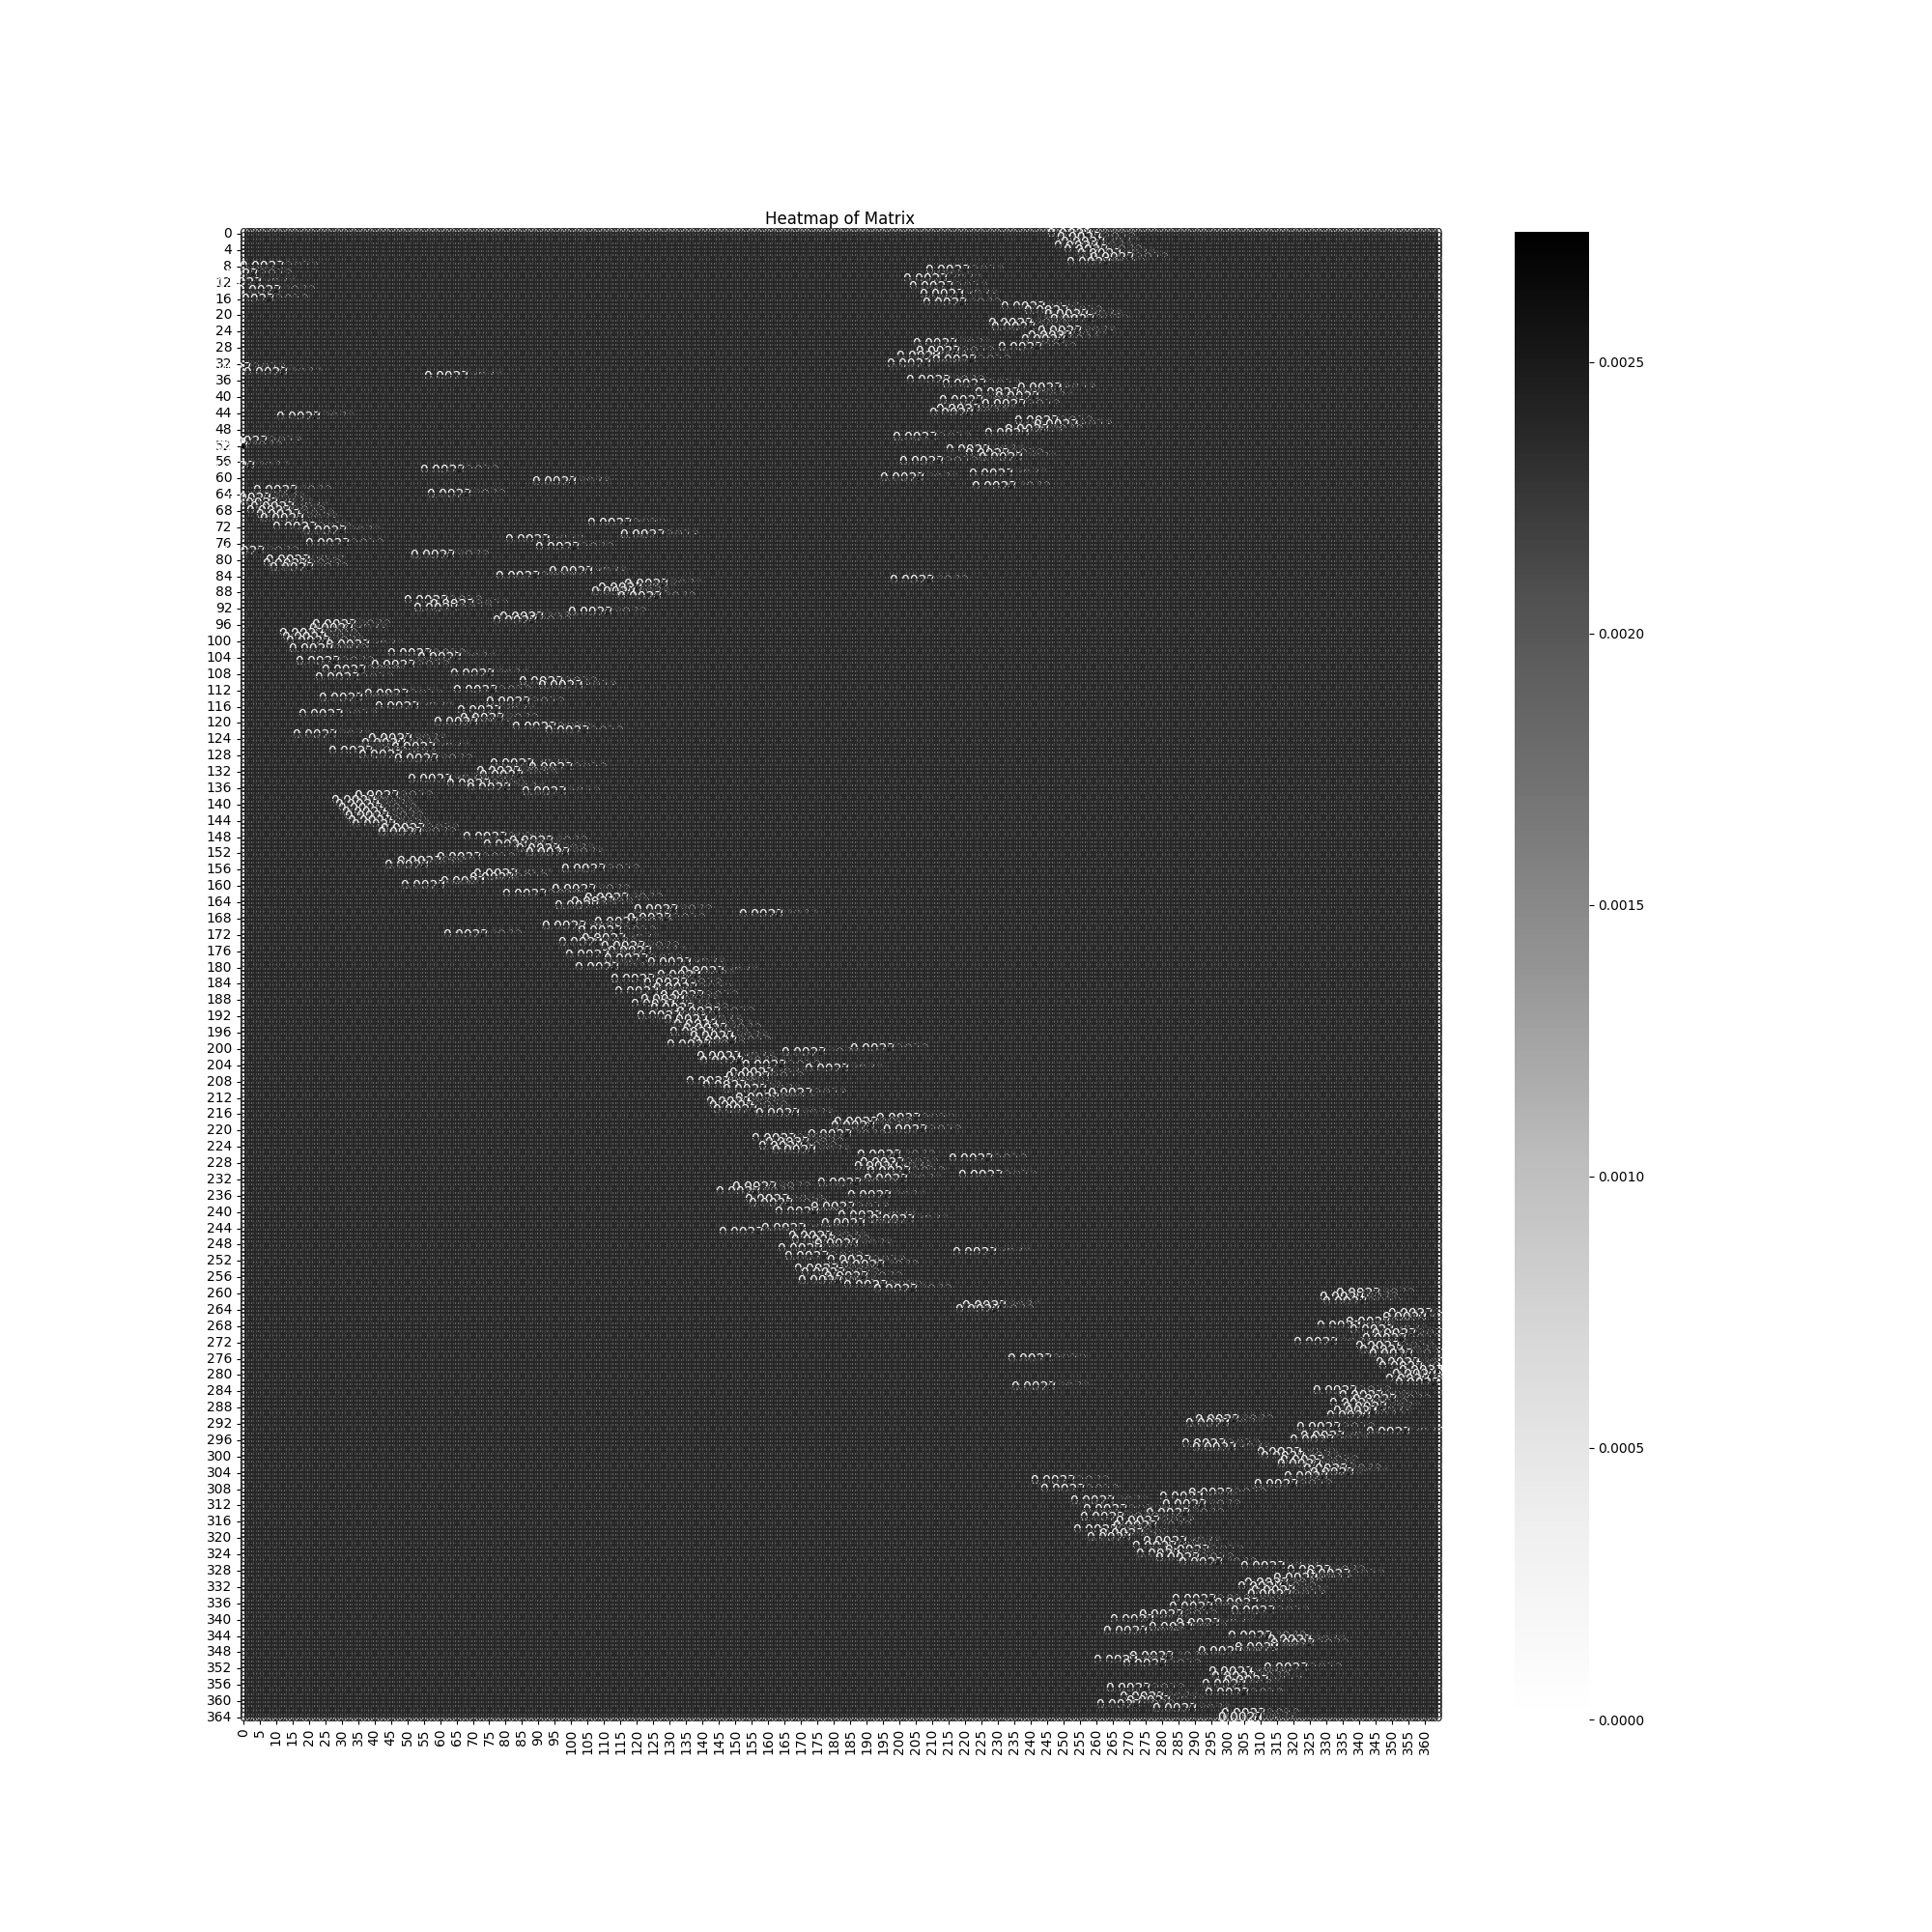

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(plan, annot=True, cmap="Greys", fmt="g")

# Show the plot
plt.title("Heatmap of Matrix")
plt.savefig(f'heatmap_of_plan_lag{lag}.pdf', dpi=30)


# Lag-experiment part

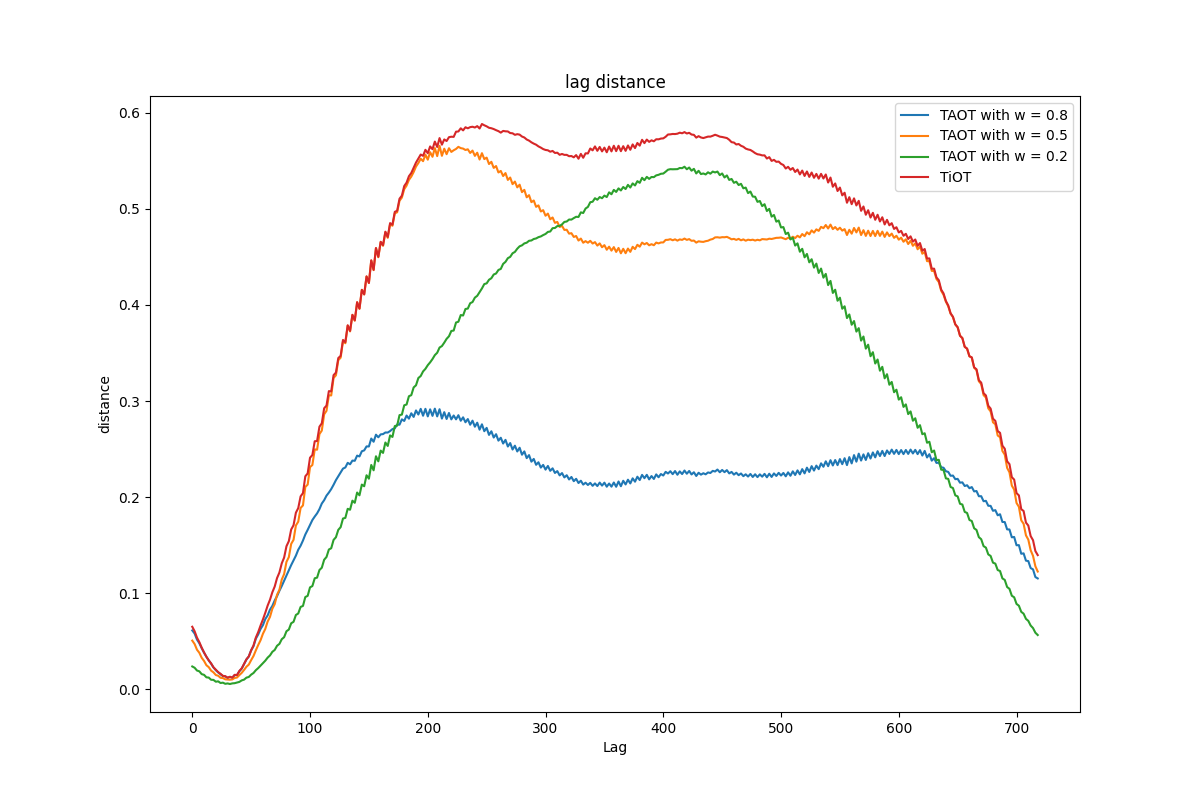

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []
for lag in range(0,360,1):
    TAOT_dist1.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.8 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist2.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.5 , costmatrix=TiOT_lib.costmatrix4)[0])
    TAOT_dist3.append(TiOT_lib.TAOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step], w = 0.2 , costmatrix=TiOT_lib.costmatrix4)[0])
    TiOT_dist.append(TiOT_lib.TiOT(df['meantemp'].iloc[:end:step], df['meantemp'].iloc[lag:lag+end-30:step])[0])

plt.figure(figsize=(12,8))
plt.plot(range(0,720,2),TAOT_dist1, label = "TAOT with w = 0.8")
np.savetxt("TAOT_dist1.txt", np.array(TAOT_dist1))

plt.plot(range(0,720,2), TAOT_dist2, label = "TAOT with w = 0.5")
np.savetxt("TAOT_dist2.txt", np.array(TAOT_dist2))

plt.plot(range(0,720,2), TAOT_dist3, label = "TAOT with w = 0.2")
np.savetxt("TAOT_dist3.txt", np.array(TAOT_dist3))

plt.plot(range(0,720,2), TiOT_dist, label = "TiOT")
np.savetxt("TiOT_dist.txt", np.array(TiOT_dist))


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

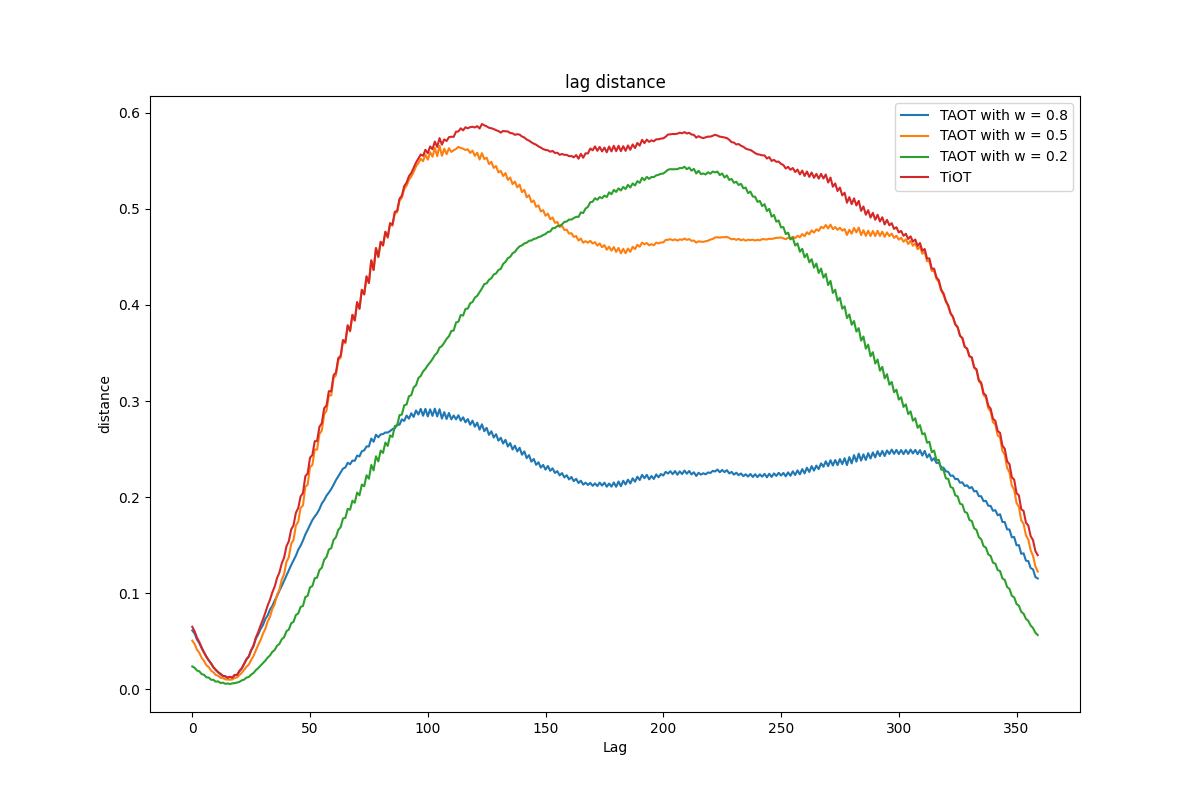

In [ ]:
TAOT_dist1 = []
TAOT_dist2 = []
TAOT_dist3 = []
TiOT_dist = []

TAOT_dist1 = np.loadtxt('TAOT_dist1.txt')
TAOT_dist2 = np.loadtxt('TAOT_dist2.txt')
TAOT_dist3 = np.loadtxt('TAOT_dist3.txt')
TiOT_dist = np.loadtxt("TiOT_dist.txt")
plt.figure(figsize=(12,8))
plt.plot(range(0,360,1),TAOT_dist1, label = "TAOT with w = 0.8")

plt.plot(range(0,360,1), TAOT_dist2, label = "TAOT with w = 0.5")

plt.plot(range(0,360,1), TAOT_dist3, label = "TAOT with w = 0.2")

plt.plot(range(0,360,1), TiOT_dist, label = "TiOT")


plt.title(f'lag distance')
plt.xlabel('Lag')
plt.ylabel('distance')
plt.legend() 
plt.savefig("Lag graph.png")
# Show the heatmap
plt.show()

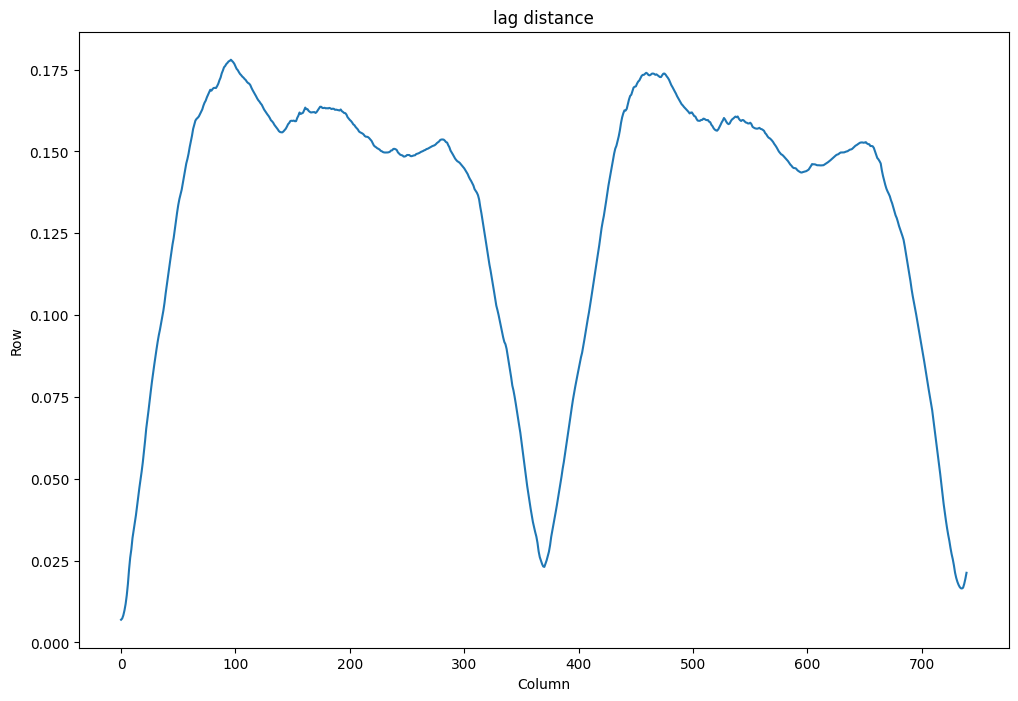

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 10)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

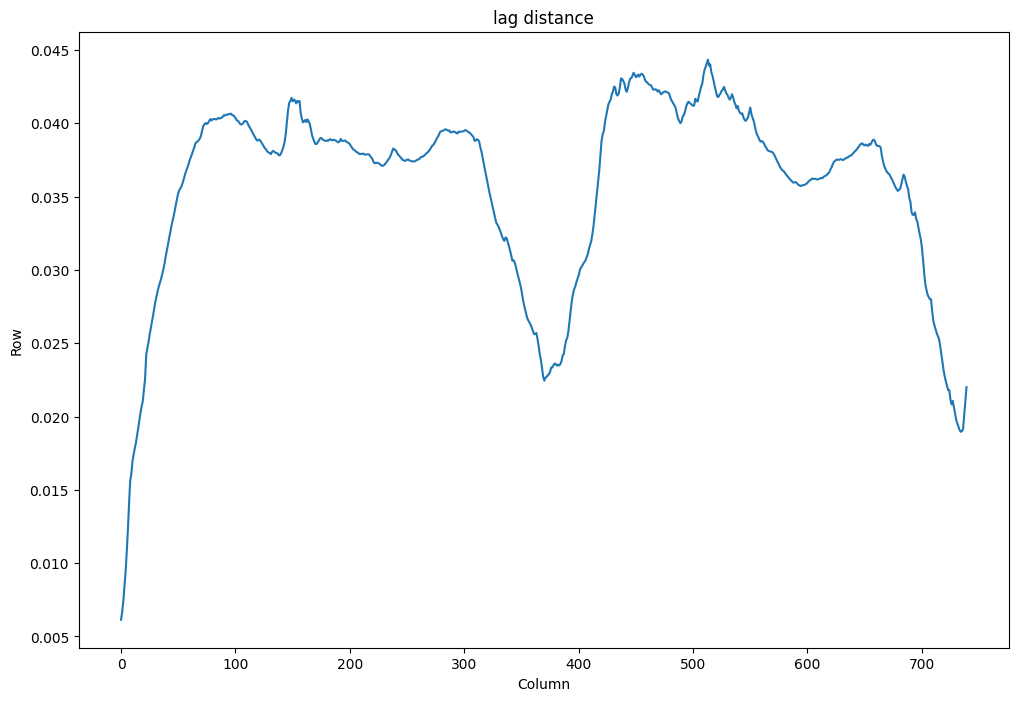

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

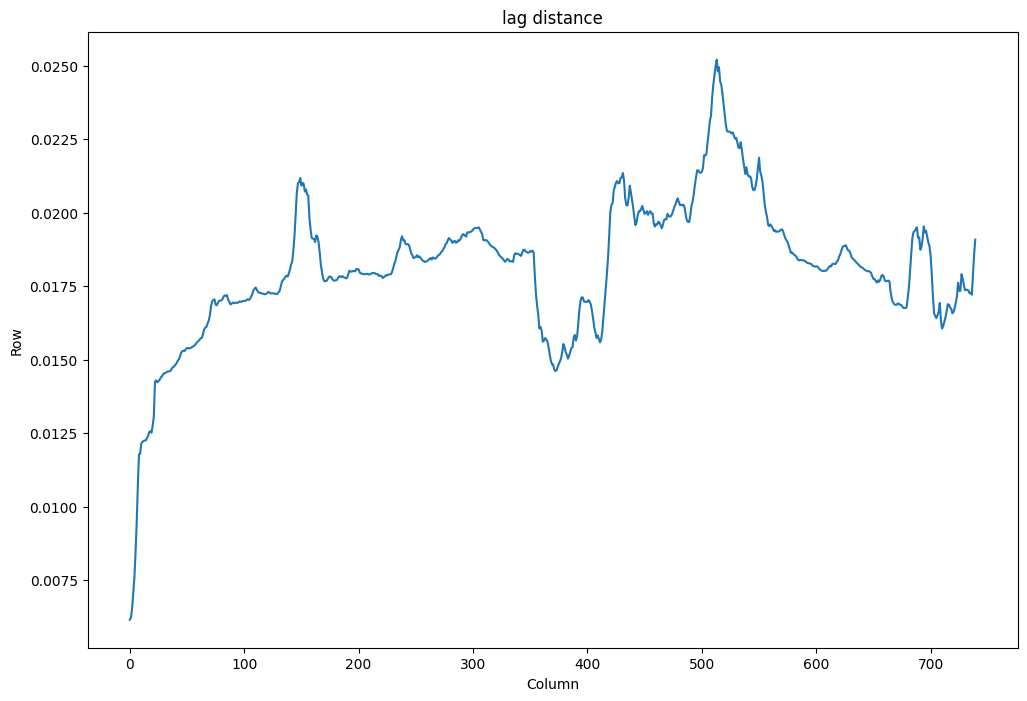

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 0.1)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

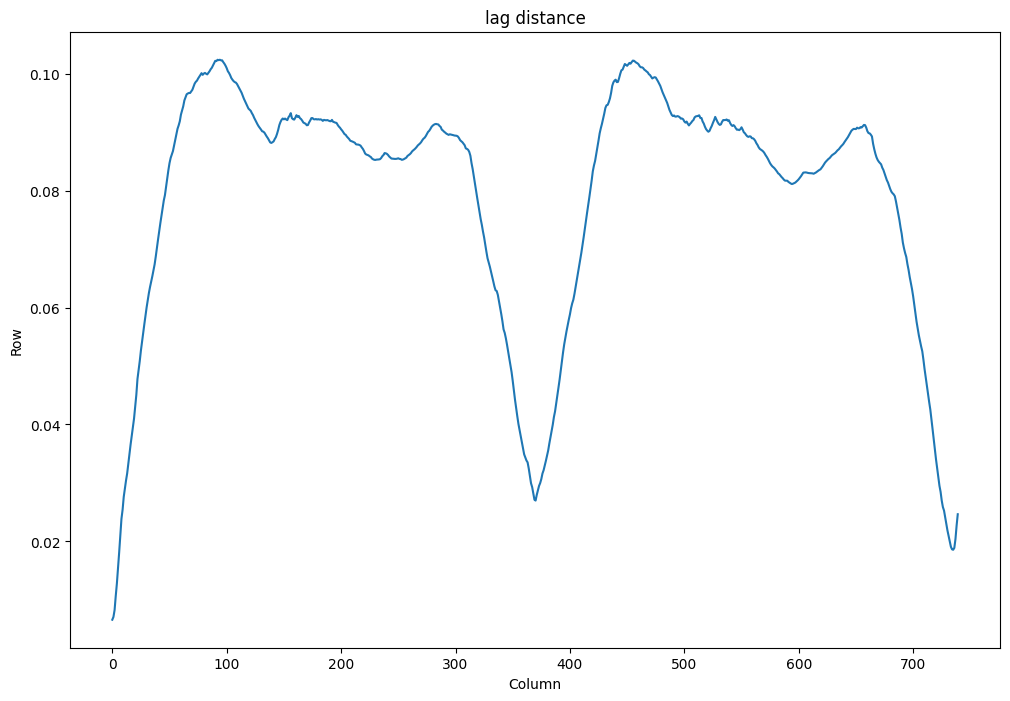

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.TAOT_distance(df.iloc[0:366]['meantemp'].to_list(), df.iloc[lag:366+lag]['meantemp'].to_list(), w = 4)[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

# Show the heatmap
plt.show()

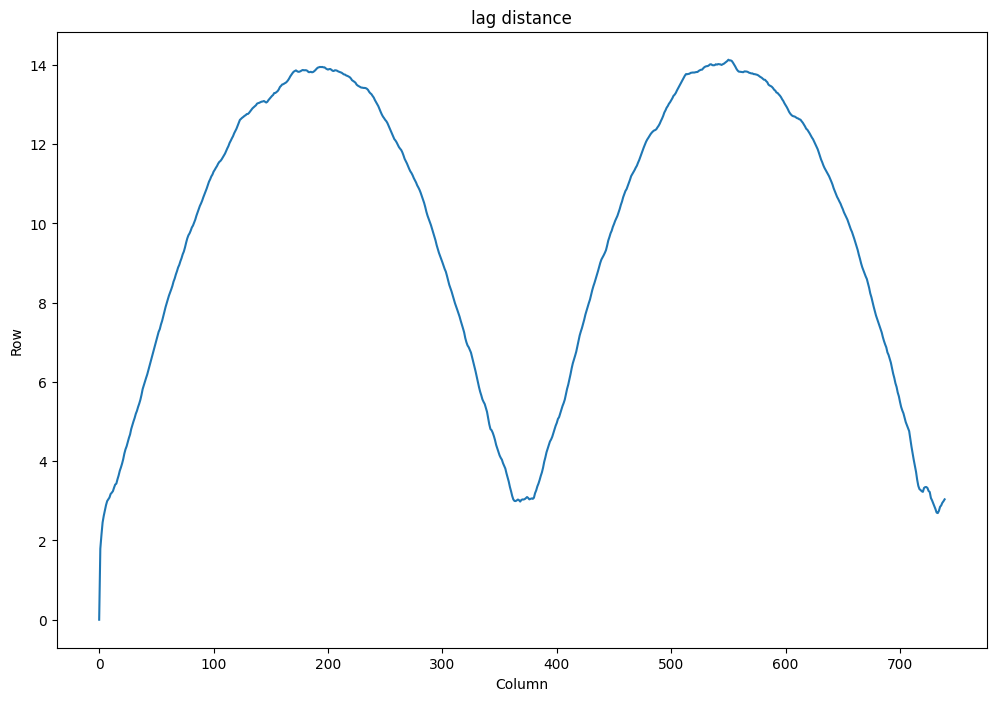

In [ ]:
lag_distances = []
for lag in range(740):
    lag_distances.append(TiOT_lib.euclid_dist(df.iloc[0:366]['meantemp'].to_numpy(), df.iloc[lag:366+lag]['meantemp'].to_numpy() )[0])

plt.figure(figsize=(12,8))
plt.plot(lag_distances)
plt.title(f'lag distance')
plt.xlabel('Column')
plt.ylabel('Row')

plt.show()